<a href="https://colab.research.google.com/github/agt14-sketch/Final-Assignment/blob/main/Data_Ethics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Analysis of Centers for Medicare & Medicaid Services (CMS) Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

**CMS** Dataset: https://data.cms.gov/provider-data/dataset/48nr-hqxx#data-table

In [5]:
#Load dataset
ds = pd.read_csv('ASCQR_OAS_CAHPS_BY_ASC (1).csv')
ds.head()

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,...,Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends",Patients recommending the facility linear mean score,Footnote,Number of Sampled Patients,Number of Completed Surveys,Survey Response Rate Percent,Start Date,End Date
0,01C0001020,MEDPLEX OUTPATIENT SURGERY CENTER LTD,4511 SOUTHLAKE PARKWAY,BIRMINGHAM,AL,35244,NaN,(205) 985-4398,98.0,2.0,...,90.0,9.0,1.0,96.0,NaN,1227.0,322.0,26.0,04/01/2023,03/31/2024
1,01C0001042,GULF COAST SURGICAL PARTNERS LLC,"3715 DAUPHIN ST, STE. 503B",MOBILE,AL,36608,NaN,(251) 272-4934,97.0,3.0,...,89.0,10.0,1.0,95.0,NaN,1385.0,368.0,27.0,04/01/2023,03/31/2024
2,01C0001046,SHELBY BAPTIST AMBULATORY SURGERY CENTER LLC,1010 1ST ST N,ALABASTER,AL,35007,NaN,(205) 620-8400,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
3,01C0001051,ALABAMA DIGESTIVE HEALTH ENDOSCOPY CENTER LLC,2010 BROOKWOOD MEDICAL CTR DR G100,BIRMINGHAM,AL,35209,NaN,(205) 877-1187,96.0,4.0,...,85.0,14.0,1.0,95.0,NaN,1412.0,323.0,23.0,04/01/2023,03/31/2024
4,01C0001053,JACKSON SURGERY CENTER LLC,1725 PARK PL,MONTGOMERY,AL,36106,NaN,(334) 293-3920,98.0,2.0,...,89.0,9.0,2.0,95.0,NaN,772.0,192.0,25.0,04/01/2023,03/31/2024


In [6]:
#overview
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 30 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Facility ID                                                                                                   653 non-null    object 
 1   Facility Name                                                                                                 653 non-null    object 
 2   Address                                                                                                       653 non-null    object 
 3   City/Town                                                                                                     653 non-null    object 
 4   State                                                   

In [7]:
#inspect data
print(ds.describe())

           ZIP Code  County/Parish  \
count    653.000000            0.0   
mean   52506.519142            NaN   
std    28188.483585            NaN   
min     1089.000000            NaN   
25%    30067.000000            NaN   
50%    48840.000000            NaN   
75%    78233.000000            NaN   
max    99352.000000            NaN   

       Patients who reported that staff definitely gave care in a professional way and the facility was clean  \
count                                         473.000000                                                        
mean                                           97.319239                                                        
std                                             1.277905                                                        
min                                            92.000000                                                        
25%                                            97.000000                                    

### Exploratory Analysis

In [8]:
#clean missing values for analysis
ds = ds.dropna(subset=[
    'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
    'Survey Response Rate Percent'
])

State-level representation

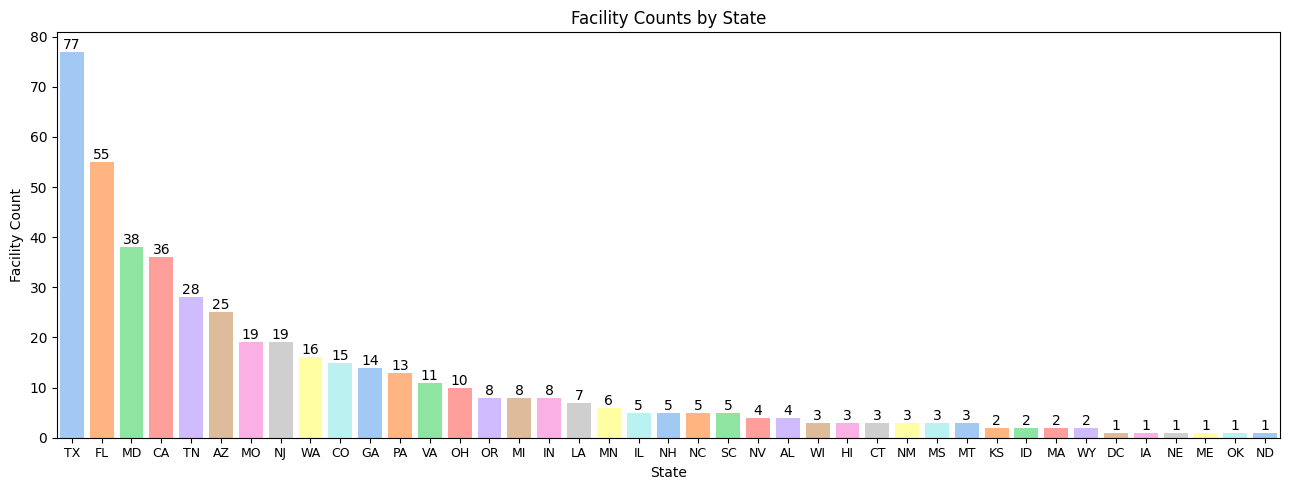

In [9]:
#geographic coverage
plt.figure(figsize=(13, 5))
state_counts = ds['State'].value_counts()
state_counts.plot(kind='bar', title='Facility Counts by State')
plt.xlabel('State')
plt.ylabel('Facility Count')

#bar color
colors = sns.color_palette('pastel')
plt.bar(state_counts.index, state_counts.values, color=colors)

for i, v in enumerate(state_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

*Survey* Response Rate Distribution

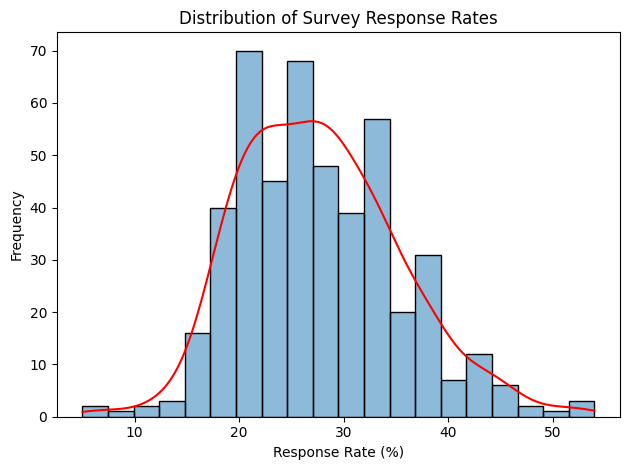

In [10]:
sns.histplot(ds['Survey Response Rate Percent'], kde=True, bins=20)
plt.title("Distribution of Survey Response Rates")
plt.xlabel("Response Rate (%)")
plt.ylabel("Frequency")
plt.gca().lines[0].set_color('red')
plt.tight_layout()
plt.show()

Average ratings by state

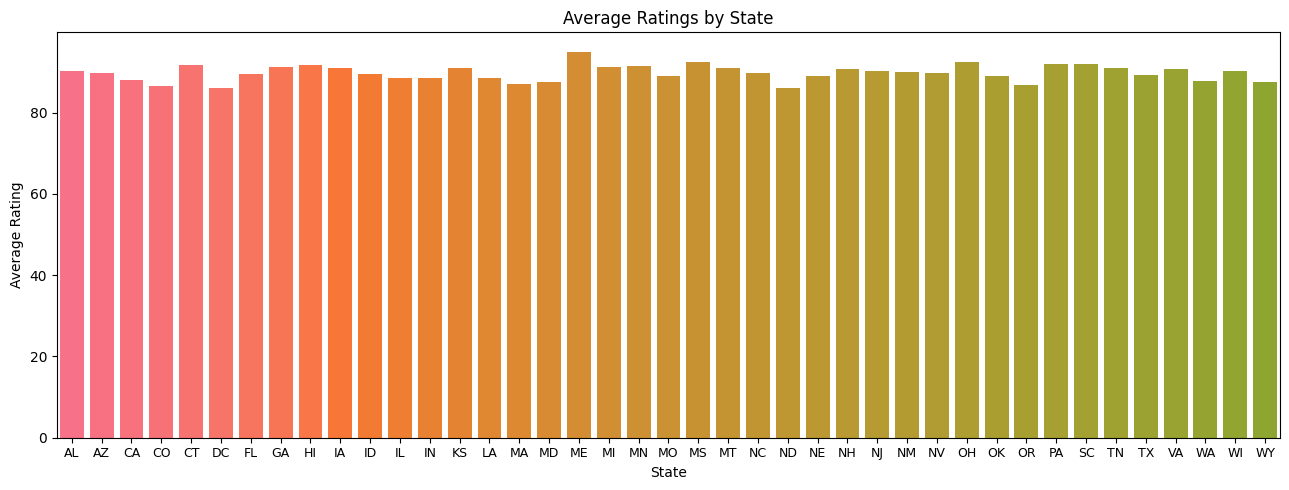

In [11]:
#demographic parity
avg_ratings_by_state = ds.groupby('State')['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)'].mean()
#remove NaN
avg_ratings_by_state = avg_ratings_by_state.dropna()
#visualize disparities
plt.figure(figsize=(13, 5))
avg_ratings_by_state.plot(kind='bar', title='Average Ratings by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
colors = sns.color_palette('husl', 150)
plt.bar(avg_ratings_by_state.index, avg_ratings_by_state.values, color=colors)
plt.xticks(fontsize=9, rotation=0)
plt.tight_layout()
plt.show()

### Distribution Analysis

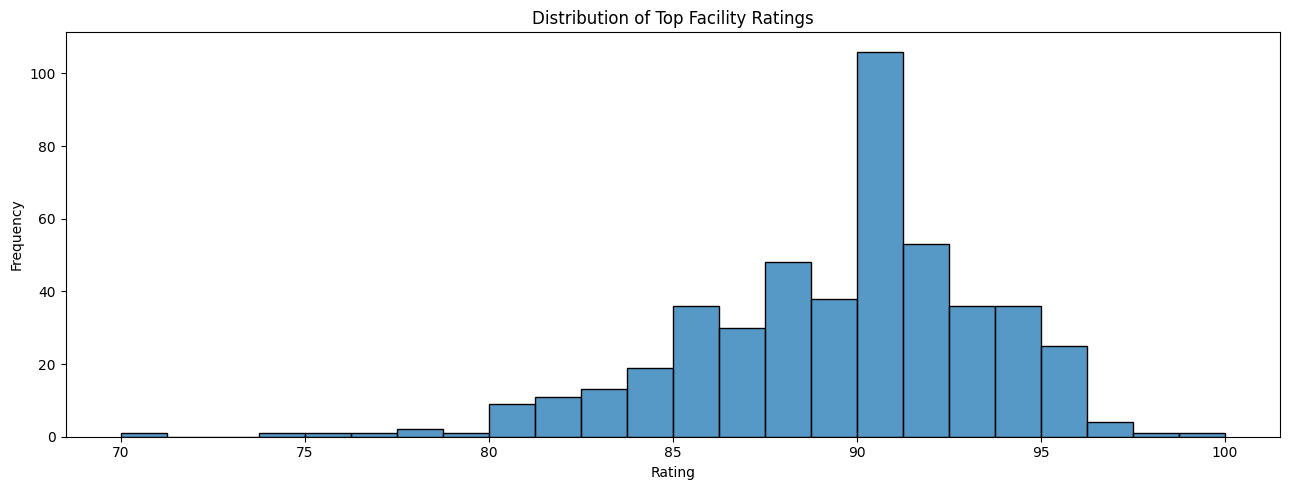

In [12]:
#rating distribution
plt.figure(figsize=(13, 5))
sns.histplot(ds['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)'])
plt.title('Distribution of Top Facility Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Bias Identification

In [13]:
from scipy.stats import kruskal
#group data by state and extract ratings
state_groups = [group.dropna() for _, group in ds.groupby('State')['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)']]

#Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*state_groups)

print(f"Kruskal-Wallis H-statistic: {h_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant disparities exist in ratings across states.")
else:
    print("No significant disparities in ratings across states.")

Kruskal-Wallis H-statistic: 75.07480058754592
P-value: 0.0006517595111682076
Significant disparities exist in ratings across states.


visualization by using boxplot

<ipython-input-14-0535b18191fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='State', y='Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', data=ds, palette=['green', 'red'])
<ipython-input-14-0535b18191fc>:2: UserWarning: 
The palette list has fewer values (2) than needed (41) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='State', y='Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', data=ds, palette=['green', 'red'])


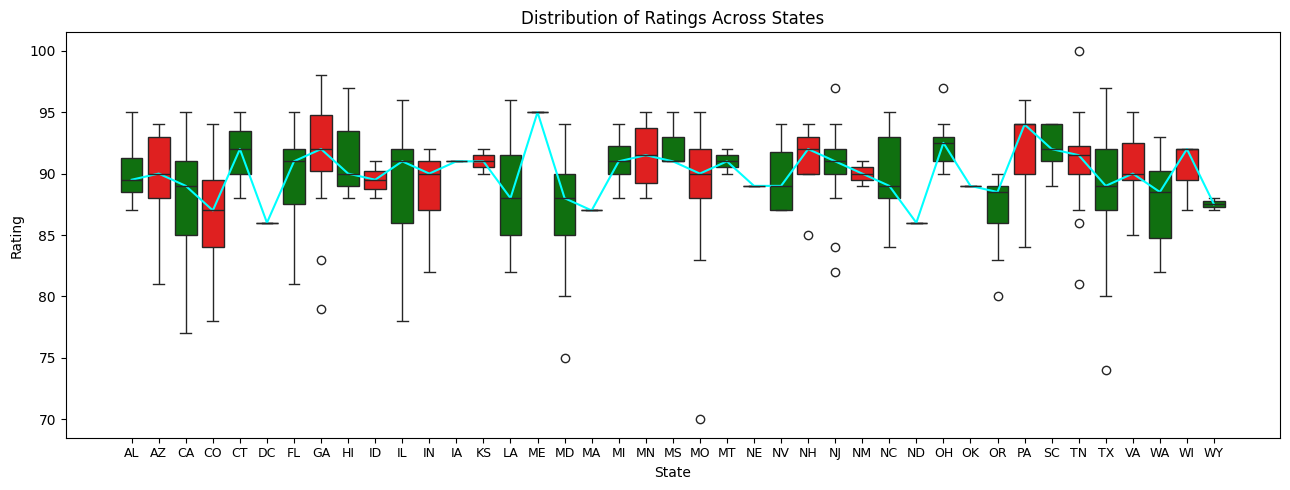

In [14]:
plt.figure(figsize=(13, 5))
ax = sns.boxplot(x='State', y='Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', data=ds, palette=['green', 'red'])
plt.title('Distribution of Ratings Across States')
plt.xlabel('State')
plt.ylabel('Rating')
plt.xticks(fontsize=9, rotation=0)
medians = [ds['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)'][ds['State'] == state].median() for state in ds['State'].unique()]
x_coords = range(len(ds['State'].unique()))
ax.plot(x_coords, medians, color='cyan', linestyle='-', label='Median Trend')
plt.tight_layout()
plt.show()

Find out missing data pattern

In [15]:
missing_data = ds.isnull().mean() * 100
print("\nMissing Data Percentage:")
print(missing_data)


Missing Data Percentage:
Facility ID                                                                                                       0.000000
Facility Name                                                                                                     0.000000
Address                                                                                                           0.000000
City/Town                                                                                                         0.000000
State                                                                                                             0.000000
ZIP Code                                                                                                          0.000000
County/Parish                                                                                                   100.000000
Telephone Number                                                                                                 

### Mitigation Strategies

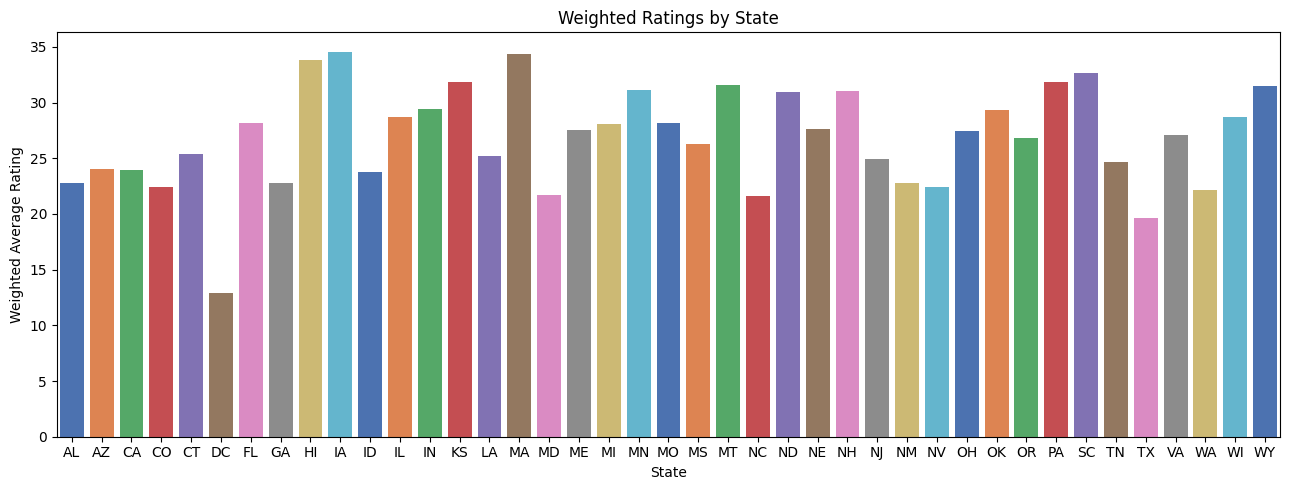

In [16]:
# Example Mitigation: Weighting ratings by survey response rate
ds['Weighted Rating'] = (
    ds['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)'] *
    ds['Survey Response Rate Percent'] / 100
)
weighted_state_ratings = ds.groupby('State')['Weighted Rating'].mean()
weighted_state_ratings.plot(kind='bar', title='Weighted Ratings by State', figsize=(13, 5))
colors = sns.color_palette('deep', 100)
plt.bar(weighted_state_ratings.index, weighted_state_ratings.values, color=colors)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel("State")
plt.ylabel("Weighted Average Rating")
plt.xticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### Data Sharing Strategies

In [17]:
#we can mask sensitive information for privacy security
ds['Masked Facility ID'] = ds['Facility ID'].apply(lambda x: hash(x))
masked_data = ds[['Masked Facility ID', 'State', 'ZIP Code', 'Weighted Rating']]
print("\nMasked Data Sample:")
masked_data.head()

#save processed data for sharing
#masked_data.to_csv("processed_data.csv", index=False)
#print("\nProcessed data saved as 'processed_data.csv'.")


Masked Data Sample:


,Masked Facility ID,State,ZIP Code,Weighted Rating
0,-1808669530538201149,AL,35244,24.70
1,3124107933097175374,AL,36608,24.03
3,866380729731862924,AL,35209,20.01
4,7193756204652455592,AL,36106,22.50
5,6670310914126075660,AZ,85381,21.36
